In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import feather

In [20]:
#%%timeit -r1 -n1 
# timeit args from: http://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook 
# For some reason the varible isn't saved when using timeit

# Note: To just read in part add nrows =
parseDates = ["Opened", "Closed", "Updated"] # Convert these to datetimes
street_csv = pd.read_csv("Street_and_Sidewalk_Cleaning.csv", 
                         #nrows = 100000,
                         parse_dates=parseDates)


In [22]:
feather.write_dataframe(street_csv, 'street.feather')

In [26]:
# Similar thing built in to pandas. Causes some error.
#street.to_hdf('street.h5','table',append=False)

In [24]:
street = feather.read_dataframe('street.feather')

In [27]:
# To use the csv version
# street = street_csv

In [19]:
all(street == street_csv)

True

In [5]:
street.head()

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Neighborhood,Updated,Point
0,322566,2008-11-30 22:56:00,2009-07-21 16:24:00,Closed,DPW Ops Queue,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,Voice In,3,Nob Hill,2009-07-21 16:24:00,"(37.795328529, -122.418067787)"
1,322560,2008-11-30 22:24:00,2009-07-21 16:24:00,Closed,DPW Ops Queue,Intersection of TAYLOR ST and TURK ST,Street and Sidewalk Cleaning,Illegal_Dumping,Garbage,Voice In,6,Downtown/Civic Center,2009-07-21 16:24:00,"(37.7832142923006, -122.410764953722)"
2,322559,2008-11-30 22:20:00,2008-12-01 06:07:00,Closed,DPW Ops Queue,"1601 SACRAMENTO ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Illegal_Dumping,Mattress,Voice In,3,Nob Hill,2008-12-01 06:07:00,"(37.791643509125, -122.419260423291)"
3,322556,2008-11-30 21:34:00,2008-12-09 08:07:00,Closed,DPW Ops Queue,Intersection of 25TH ST and LUCKY ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Human_waste_or_urine,Voice In,9,Mission,2008-12-09 08:07:00,"(37.7509362479361, -122.413364630104)"
4,322545,2008-11-30 20:45:00,2009-02-03 07:09:00,Closed,DPW Ops Queue,Intersection of 19TH ST and OAKWOOD ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Empty_cart,Voice In,8,Mission,2009-02-03 07:09:00,"(37.7598935230725, -122.42486308879)"


Some basic statistics on the dataset we are starting with:

In [28]:
numRows = street.shape[0]
print "We are working with", numRows, "rows."
print "Our dates range from", street.loc[numRows - 1, "Opened"],"to", street.loc[0, "Opened"], "."

We are working with 747388 rows.
Our dates range from 2017-01-22 00:26:01 to 2008-11-30 22:56:00 .


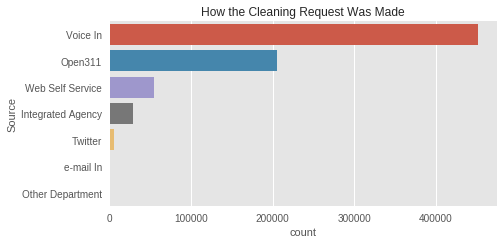

In [29]:
#plt.figure(figsize=(2,100)) # Doesn't do much
theOrder = ["Voice In", "Open311", "Web Self Service", "Integrated Agency", "Twitter", "e-mail In", "Other Department"]
#sns.set(font_scale = 1.5)
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(y = "Source", data = street, kind = "count", orient = "h", order = theOrder, aspect = 2)#, size = 10)
plt.title("How the Cleaning Request Was Made") 
plt.show()

According to [the project's website](http://www.open311.org/learn/), Open311 allows people to report issues in public spaces to city officials through a [website](https://sf311.org/index.aspx?page=797) or [mobile app](https://www.sf311.org/mobile).  

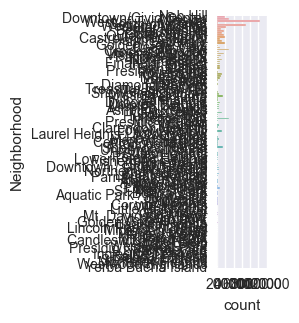

In [100]:
#plt.figure(figsize=(2,100)) # Doesn't do much
#theOrder = ["Voice In", "Open311", "Web Self Service", "Integrated Agency", "Twitter", "e-mail In", "Other Department"]
#sns.set(font_scale = 1.5)
#sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(y = "Neighborhood", data = street, kind = "count", orient = "h")# order = theOrder, aspect = 2)#, size = 10)
#plt.title("How the Cleaning Request Was Made") 
plt.show()

In [7]:
street.Neighborhood.unique()

array(['Nob Hill', 'Downtown/Civic Center', 'Mission',
       'West of Twin Peaks', 'South of Market', 'Western Addition',
       'Outer Mission', 'Bernal Heights', 'Russian Hill', 'Outer Sunset',
       'Outer Richmond', 'Castro/Upper Market', 'Haight Ashbury',
       'Excelsior', 'Golden Gate Park', 'Ocean View', 'Bayview',
       'Crocker Amazon', 'Inner Richmond', 'Visitacion Valley',
       'Pacific Heights', 'North Beach', 'Parkside', 'Financial District',
       'Inner Sunset', 'Marina', 'Twin Peaks', 'Presidio Heights',
       'Potrero Hill', 'Chinatown', 'Noe Valley', 'Lakeshore', 'Seacliff',
       'Glen Park', 'Diamond Heights', 'Presidio', nan,
       'Treasure Island/YBI'], dtype=object)

In [8]:
street.Neighborhood.value_counts

<bound method Series.value_counts of 0                    Nob Hill
1       Downtown/Civic Center
2                    Nob Hill
3                     Mission
4                     Mission
5                     Mission
6                     Mission
7                     Mission
8          West of Twin Peaks
9          West of Twin Peaks
10                    Mission
11            South of Market
12           Western Addition
13              Outer Mission
14             Bernal Heights
15                   Nob Hill
16            South of Market
17                    Mission
18               Russian Hill
19                   Nob Hill
20      Downtown/Civic Center
21           Western Addition
22           Western Addition
23               Outer Sunset
24                   Nob Hill
25             Outer Richmond
26            South of Market
27            South of Market
28        Castro/Upper Market
29        Castro/Upper Market
                ...          
9970           Bernal Heights
997

In [34]:
# From: http://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
counts = street.groupby('Neighborhood').count()
counts.head()

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Updated,Point
Neighborhood,,,,,,,,,,,,,
Alamo Square,1457,1457,1447,1457,1457,1457,1457,1455,1455,1457,1457,1457,1457
Anza Vista,389,389,376,389,389,389,389,389,389,389,389,389,389
Apparel City,2214,2214,2139,2214,2214,2214,2214,2214,2214,2214,2214,2214,2214
Aquatic Park / Ft. Mason,340,340,333,340,340,340,340,340,340,340,340,340,340
Ashbury Heights,725,725,716,725,725,725,725,725,725,725,725,725,725


We can get the total number of cases from CaseID
unresolved cases by neighborhood

In [52]:
counts.sort_values(by = "CaseID",
            ascending = False)

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Updated,Point
Neighborhood,,,,,,,,,,,,,
Mission,103254,103254,101783,103254,103254,103254,103254,103242,103240,103254,103254,103254,103254
South of Market,70221,70221,69009,70221,70221,70221,70221,70215,70215,70221,70221,70221,70221
Tenderloin,29747,29747,29272,29747,29747,29747,29747,29746,29746,29747,29747,29747,29747
Bayview,28256,28256,27916,28256,28256,28256,28256,28256,28255,28256,28256,28256,28256
Downtown/Civic Center,27985,27985,27948,27985,27985,27985,27985,27985,27984,27985,27985,27985,27985
Western Addition,21509,21509,21401,21509,21509,21509,21509,21509,21509,21509,21509,21509,21509
Excelsior,19244,19244,19088,19244,19244,19244,19244,19244,19244,19244,19244,19244,19244
Outer Richmond,19005,19005,18747,19005,19005,19005,19005,19004,19004,19005,19005,19005,19005
Nob Hill,18924,18924,18749,18924,18924,18924,18924,18922,18921,18924,18924,18924,18924
